In [5]:
pip install numpy pandas matplotlib tensorflow scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

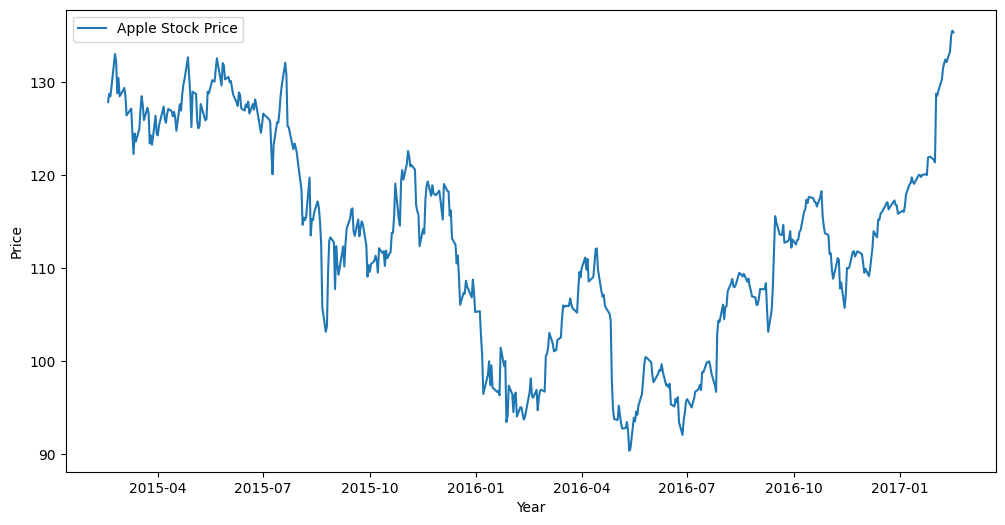

In [7]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv"
df = pd.read_csv(url)

# Convert date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Use only "Close" prices for prediction
data = df[["AAPL.Close"]].copy()
data.rename(columns={"AAPL.Close": "Close"}, inplace=True)

# Visualize data
plt.figure(figsize=(12, 6))
plt.plot(data, label="Apple Stock Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

# Convert back to DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=["Close"], index=data.index)


In [9]:
train_size = int(len(data) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

In [10]:
def create_sequences(dataset, seq_length=50):
    X, y = [], []
    for i in range(len(dataset) - seq_length):
        X.append(dataset[i:i+seq_length].values)
        y.append(dataset.iloc[i+seq_length].values)
    return np.array(X), np.array(y)

seq_length = 50  # Number of previous days to use for prediction
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [11]:
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation="relu"),
    Dense(1)
])

model.compile(optimizer="adam", loss="mean_squared_error")
model.summary()

2025-02-11 04:40:47.947171: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,301 (493.36 KB)

 Trainable params: 126,301 (493.36 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.1778 - val_loss: 0.0443
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0233 - val_loss: 0.0054
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0213 - val_loss: 0.0319
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0118 - val_loss: 0.0126
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0096 - val_loss: 0.0068
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0086 - val_loss: 0.0054
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0078 - val_loss: 0.0051
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0086 - val_loss: 0.0080
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0069 - val_loss: 0.0078
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0062 - val_loss: 0.0049
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0054 - val_loss: 0.0094
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step


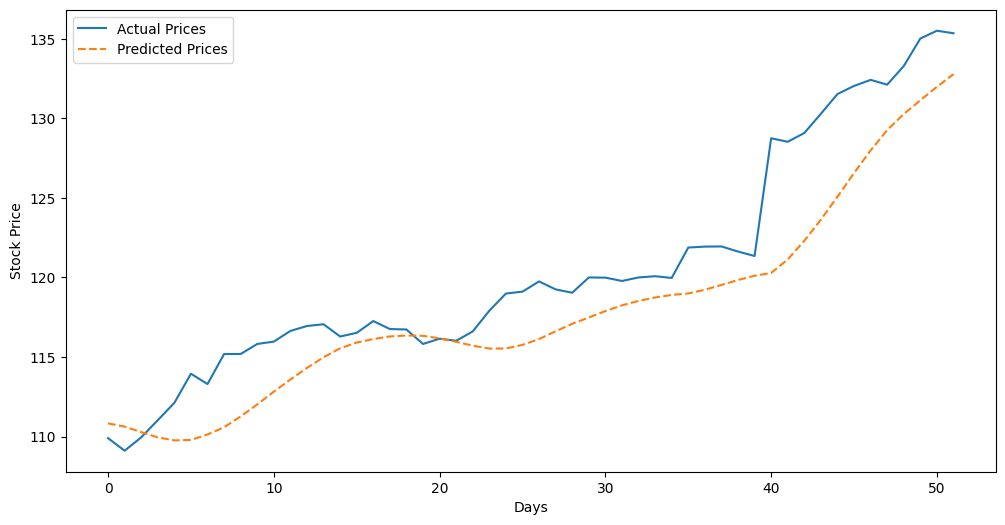

In [13]:
predicted_prices = model.predict(X_test)

# Convert back to original scale
predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test)

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label="Actual Prices")
plt.plot(predicted_prices, label="Predicted Prices", linestyle="dashed")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()